<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2023_project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from itertools import combinations

#Load and examine the data

In [ ]:
#penguin dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/penguins_size.csv')
penguins.info()

The dataset consists of 7 columns:
1.   species: penguin species (Chinstrap, Adélie, or Gentoo)
2.   island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
3.   culmen_length_mm: culmen length (mm)
4.   culmen_depth_mm: culmen depth (mm)
5.   flipper_length_mm: flipper length (mm)
6.   body_mass_g: body mass (g)
7.   sex: penguin sex


In [ ]:
#print the dataset


In [ ]:
#show dataset statistics


In [ ]:
#count the number of entries


In [ ]:
#remove the NaN


In [ ]:
#show dataset statistics again


In [ ]:
#count again the number of entries


In [ ]:
#create an individual histogram for each column


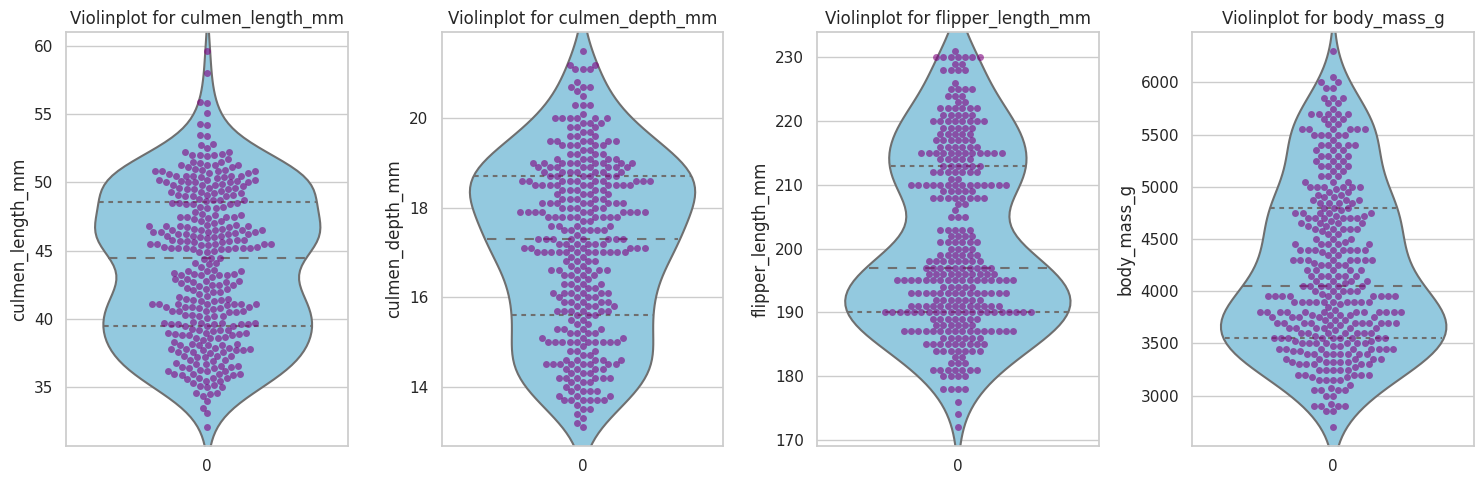

In [ ]:
#filter for numeric columns only
penguins_numeric_columns = penguins.select_dtypes(include=['number'])
#set the Seaborn theme globally
sns.set_theme(style="whitegrid")
#create a grid of subplots
fig, axes = plt.subplots(1, len(penguins_numeric_columns.columns), figsize=(15, 5))
#loop through each numeric column and create a violinplot plot in a subplot
for i, column in enumerate(penguins_numeric_columns.columns):
    sns.violinplot(data=penguins_numeric_columns[column], color="skyblue", inner="quart", ax=axes[i])
    sns.swarmplot(data=penguins_numeric_columns[column], color="purple", alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Violinplot for {column}')
#ensure subplots don't overlap
plt.tight_layout()
plt.show()

#Clustering

In [ ]:
#scale penguins_numeric_columns with StandardScaler


#apply k-means clustering to the scaled data, check with 2, 3 and 4 clusters
#plot the k-means clusters and bellow the silhouette plot for each cluster


#Classification

In [ ]:
#convert the labels to integer values
lb = LabelEncoder()
y = lb.fit_transform(penguins['species'])
#examine the histogram of the labels
plt.hist(y, bins=20, color='blue', edgecolor='black')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2])
plt.grid()
plt.show()

In [ ]:
#define the scaled penguins_numeric_columns data as input features

#split X and y into training and testing sets

#instantiate a logistic regression model (using default parameters with maximum of 1000 runs)

#fit the model with data

#make predictions on the testing set


In [ ]:
#perform model evaluation using macro averages
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))

In [ ]:
#convert the labels to one-hot-encoding
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

#define the number of classes
n_classes = 3

#initialize an empty dictionary to store ROC curves and AUC values for each class, and then fill it in a loop
roc_curves = {}
auc_values = {}
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_curves[i] = (fpr, tpr)
    auc_values[i] = auc(fpr, tpr)

#plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {auc_values[i]:.2f})')
#plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

#print AUC values for each class
for i in range(n_classes):
    print(f'Class {i} AUC: {auc_values[i]:.2f}')

#Add noise to the data

In [ ]:
#data without noise
penguins_numeric_columns

In [ ]:
#define the standard deviation of the noise
std_dev = 10
#get the number of rows and columns in the DataFrame
num_rows, num_columns = penguins_numeric_columns.shape
#generate AWGN with the same shape as the DataFrame
noise = np.random.normal(0, std_dev, (num_rows, num_columns))
#add the noise to the DataFrame
penguins_with_noise = penguins_numeric_columns + noise
#replace negative values with zero so that the data is non-negative
penguins_with_noise[penguins_with_noise < 0] = 0
penguins_with_noise

In [ ]:
#plot the clean and noisy data
#create subplots for each column
num_columns = penguins_numeric_columns.shape[1]
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 4 * num_columns))

#loop through each column and create line plots
for i, column in enumerate(penguins_numeric_columns.columns):
    ax = axes[i]
    #plot the clean data
    ax.plot(penguins_numeric_columns.index, penguins_numeric_columns[column], label='Clean data', color='blue')
    #plot the noisy data
    ax.plot(penguins_with_noise.index, penguins_with_noise[column], label='Noisy data', color='red')
    ax.set_xlabel('Sample')
    ax.set_ylabel(column)
    ax.legend()
plt.tight_layout()
plt.show()

#Redo clustering and classification with the noisy data



In [ ]:
#clustering the noisy data with 3 classes


In [ ]:
#classification with the noisy data using lofistic regressions


#Classification of noisy data with other models



In [ ]:
#using SVM


In [ ]:
#using a tree


In [ ]:
#using kNN


In [ ]:
#search for the optimal k to use in kNN


In [ ]:
#using kNN with optimal k


#Regression

In [ ]:
#Use the three first columns of penguins_with_noise dataframe (culmen_length_mm,
#culmen_depth_mm,	and flipper_length_mm) to forecast the fourth	(body_mass_g)
X = X_train[:,:3]
y = X_train[:,3]

In [ ]:
#split the data

#define the neural network model

#train the model


In [ ]:
#make predictions and estimate the error

#plot the predictions


In [ ]:
#Use the first, third, and fourth columns of penguins_with_noise dataframe
#now in X_scaled to forecast the second	column


In [ ]:
#Use the first, second, and fourth columns of penguins_with_noise dataframe
#now in X_scaled to forecast the third column


In [ ]:
#repeat the regression exercises but using the original data (without noise)
#forecast column 4

#forecast column 2

#forecast column 3
